# <center>Employee Churn Analysis and Prediction</center>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline

## Codebook
1. `satisfaction_level` - Уровень удовлетворенности работой
1. `Last_evaluation` - Время с момента последней оценки в годах
1. `number_projects` - Количество проектов, выполненных за время работы
1. `average_monthly_hours` - Среднее количество часов на рабочем месте в месяц
1. `time_spend_company` - Стаж работы в компании в годах
1. `work_accident` - Происходили ли несчастные случаи на рабочем месте с сотрудником
1. `left` - уволился ли сотрудник
1. `promotion_last_5years` - повышался ли сотрудник за последние пять лет
1. `department` - отдел в котором работает сотрудник
1. `salary` - относительный уровень зарплаты

## EDA

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
department - 0.0%
salary - 0.0%


There are no NaNs in the dataset.

### Basic numbers

In [5]:
# number of employees by department
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

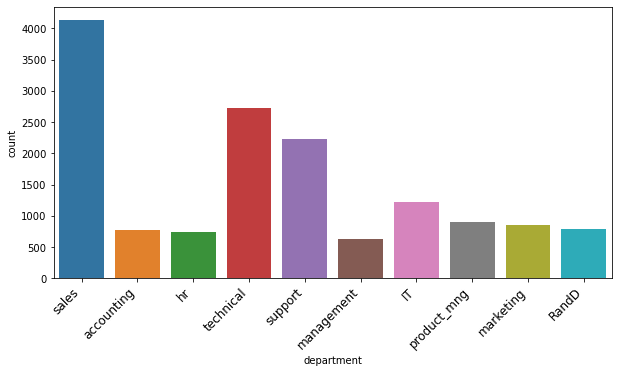

In [13]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='department'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'

)

In [14]:
# salary counts
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

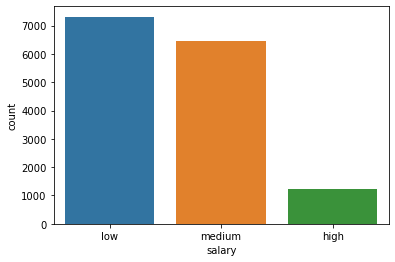

In [122]:
sns.countplot(x='salary',  data=df)

In [55]:
# salary vs. department in percentages
salary_dept = pd.crosstab(index = df['department'], 
                           columns = df['salary'], normalize='index')

salary_dept

salary,high,low,medium
department,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

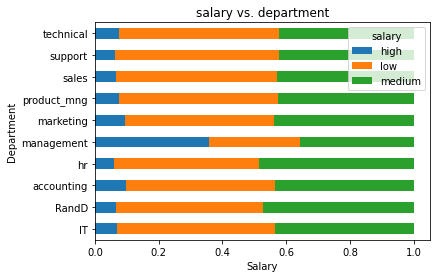

In [56]:
salary_dept.plot.barh(stacked=True)
plt.title("salary vs. department")
plt.xlabel("Salary")
plt.ylabel("Department")
plt.xticks(rotation=0, horizontalalignment="center")

More or less equal distribution of salaries accross departments except for managers who have a larger proportion of high salaries.

### Categorical variables analysis

In [41]:
# Work_accident vs. left in percentages
outcome_Work_accident = pd.crosstab(index = df['left'], 
                           columns = df['Work_accident'], normalize='index') # percentages based on index

outcome_Work_accident.index= ['Did not leave', 'Left']
outcome_Work_accident

Work_accident,0,1
Did not leave,0.824991,0.175009
Left,0.952674,0.047326


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

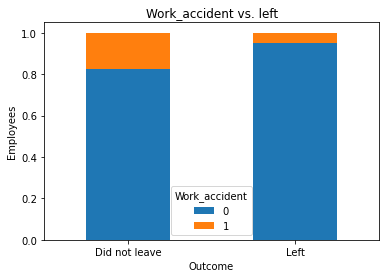

In [42]:
outcome_Work_accident.plot(kind="bar", stacked=True)
plt.title("Work_accident vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

Fewer accidents among those who left.

In [43]:
# promotion_last_5years vs. left in percentages
outcome_promotion_last_5years = pd.crosstab(index = df['left'], 
                           columns = df['promotion_last_5years'], normalize='index')

outcome_promotion_last_5years.index= ['Did not leave', 'Left']
outcome_promotion_last_5years

promotion_last_5years,0,1
Did not leave,0.973749,0.026251
Left,0.994679,0.005321


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

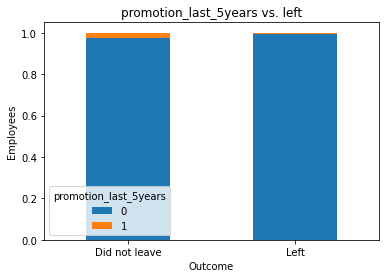

In [133]:
outcome_promotion_last_5years.plot(kind="bar", stacked=True)
plt.title("promotion_last_5years vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

Almost no promotion among those who left.

In [49]:
# department vs. left in percentages
outcome_department = pd.crosstab(index = df['left'], 
                           columns = df['department'], normalize='index')

outcome_department.index= ['Did not leave', 'Left']
outcome_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Did not leave,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
Left,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

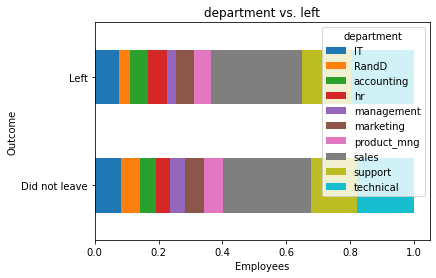

In [102]:
outcome_department.plot.barh(stacked=True)
plt.title("department vs. left")
plt.xlabel("Employees")
plt.ylabel("Outcome")
plt.xticks(rotation=0, horizontalalignment="center")

Fairly similar distribution among those who left and those who did not leave.

In [51]:
# salary vs. left in percentages
outcome_salary = pd.crosstab(index = df['left'], 
                           columns = df['salary'], normalize='index')

outcome_salary.index= ['Did not leave', 'Left']
outcome_salary

salary,high,low,medium
Did not leave,0.101068,0.450123,0.448810
Left,0.022963,0.608233,0.368804


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

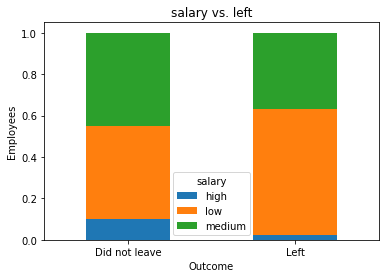

In [134]:
outcome_salary.plot(kind="bar", stacked=True)
plt.title("salary vs. left")
plt.xlabel("Outcome")
plt.ylabel("Employees")
plt.xticks(rotation=0, horizontalalignment="center")

Fewer people with high and medium salary leave.

In [95]:
# time_spend_company vs. left in percentages
outcome_time_spend_company = pd.crosstab(index = df['left'], 
                           columns = df['time_spend_company'], normalize='index')

outcome_time_spend_company.index= ['Did not leave', 'Left']
outcome_time_spend_company

time_spend_company,2,3,4,5,6,7,8,10
Did not leave,0.279226,0.425009,0.14587,0.056003,0.044540,0.016451,0.014176,0.018726
Left,0.014842,0.444133,0.24923,0.233268,0.058527,0.000000,0.000000,0.000000


Text(0, 0.5, 'Outcome')

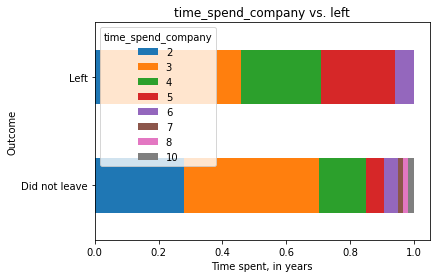

In [128]:
outcome_time_spend_company.plot.barh(stacked=True)
plt.title("time_spend_company vs. left")
plt.xlabel("Time spent, in years")
plt.ylabel("Outcome")

Those who work for 2, 7, 8 and 9 years almost always stay.

In [26]:
# mean number_project vs. left
proj_left = df.groupby('left').number_project.mean()
proj_left

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

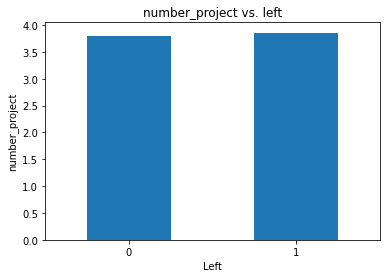

In [33]:
proj_left.plot(kind="bar", stacked=True)
plt.title("number_project vs. left")
plt.xlabel("Left")
plt.ylabel("number_project")
plt.xticks(rotation=0, horizontalalignment="center")

Mean numer of projects' bar plot not very informative.

In [28]:
# number_project vs. left in percentages
outcome_number_project = pd.crosstab(index = df['left'], 
                           columns = df['number_project'], normalize='index')

outcome_number_project.index= ['Did not leave', 'Left']
outcome_number_project

number_project,2,3,4,5,6,7
Did not leave,0.071841,0.348530,0.346167,0.188047,0.045415,0.000000
Left,0.438813,0.020162,0.114534,0.171381,0.183422,0.071689


Text(0, 0.5, 'Outcome')

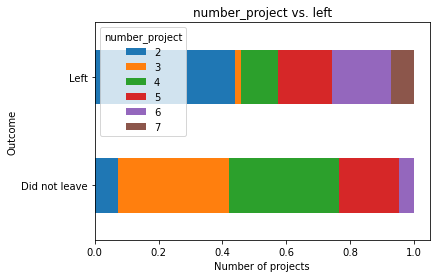

In [29]:
outcome_number_project.plot.barh(stacked=True)
plt.title("number_project vs. left")
plt.xlabel("Number of projects")
plt.ylabel("Outcome")

- Employees with 2 projects leave more often
- Those with 3 projects almost never leave
- Those with 4 projects stay more often
- Those with 7 projects leave

**Conclusion for categorical variables:** among categorical variables `promotion_last_5years`, `salary`, `time_spend_company`, `number_project` may become good predictors for the model. It is interesting to note that people who had more work related accidents tend to stay more often.

### Summary statistics for numerical variables

In [106]:
df[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].describe()

,satisfaction_level,last_evaluation,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


#### satisfaction_level

[Text(0, 0.5, 'frequency')]

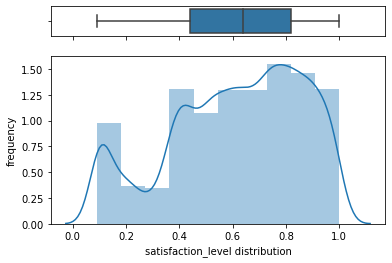

In [63]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["satisfaction_level"], ax=ax_box)
sns.distplot(df["satisfaction_level"], ax=ax_hist, bins=10)
ax_box.set(xlabel='')
ax_hist.set(xlabel='satisfaction_level distribution')
ax_hist.set(ylabel='frequency')

Quite a lot of unsatisfied employees.

[Text(0, 0.5, 'frequency')]

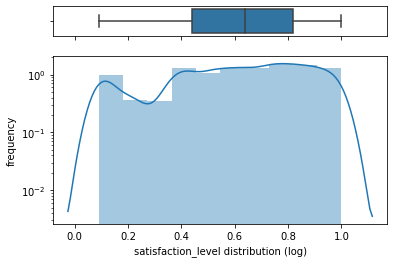

In [110]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["satisfaction_level"], ax=ax_box)
sns.distplot(df["satisfaction_level"], ax=ax_hist, bins=10).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='satisfaction_level distribution (log)')
ax_hist.set(ylabel='frequency')

In [21]:
# satisfaction level vs. left
sat_left = df.groupby('left').satisfaction_level.mean()
sat_left

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

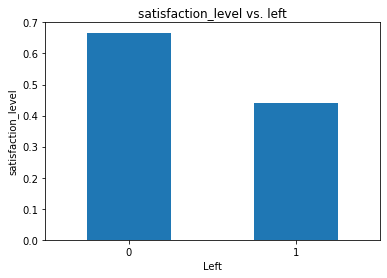

In [85]:
sat_left.plot(kind="bar", stacked=True)
plt.title("satisfaction_level vs. left")
plt.xlabel("Left")
plt.ylabel("satisfaction_level")
plt.xticks(rotation=0, horizontalalignment="center")

Those who left are significantly less satisfied.

In [52]:
# satisfaction level by department
sat_dept = df.groupby('department').satisfaction_level.mean().sort_values()
sat_dept

department
accounting     0.582151
hr             0.598809
technical      0.607897
sales          0.614447
IT             0.618142
support        0.618300
marketing      0.618601
product_mng    0.619634
RandD          0.619822
management     0.621349
Name: satisfaction_level, dtype: float64

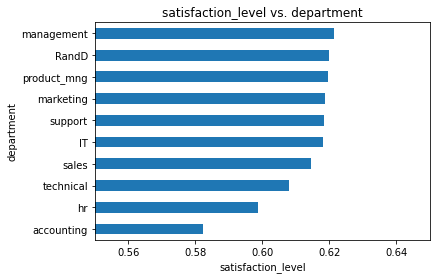

In [53]:
sat_dept.plot.barh(stacked=True)
plt.title("satisfaction_level by department")
plt.xlabel("satisfaction_level")
plt.ylabel("department")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlim(0.55, 0.65)
plt.show()

Accountants, HR and technical people are visible less satisfied.

#### last_evaluation

[Text(0, 0.5, 'frequency')]

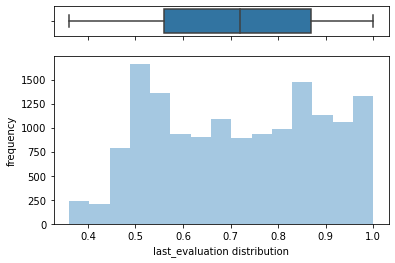

In [77]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["last_evaluation"], ax=ax_box)
sns.distplot(df["last_evaluation"], ax=ax_hist, bins=15, kde=False)
ax_box.set(xlabel='')
ax_hist.set(xlabel='last_evaluation distribution')
ax_hist.set(ylabel='frequency')

Bimodal distribution.

[Text(0, 0.5, 'frequency')]

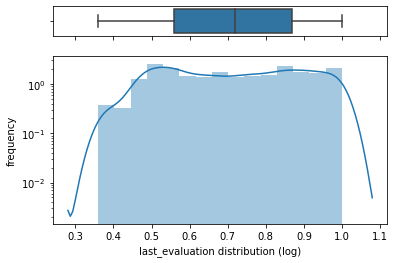

In [115]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["last_evaluation"], ax=ax_box)
sns.distplot(df["last_evaluation"], ax=ax_hist, bins=15).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='last_evaluation distribution (log)')
ax_hist.set(ylabel='frequency')

In [86]:
# last_evaluation vs. left
eval_left = df.groupby('left').last_evaluation.mean()
eval_left

left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

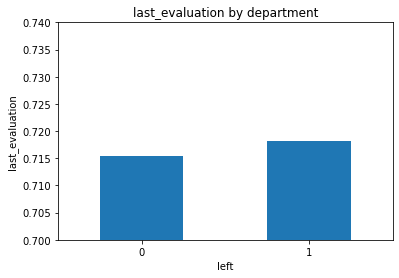

In [93]:
eval_left.plot(kind="bar", stacked=True)
plt.title("last_evaluation  vs. left")
plt.xlabel("left")
plt.ylabel("last_evaluation")
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylim(0.7, 0.74)
plt.show()

The difference is extremely small.

#### average_montly_hours

[Text(0, 0.5, 'frequency')]

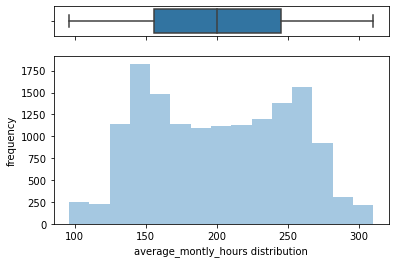

In [86]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["average_montly_hours"], ax=ax_box)
sns.distplot(df["average_montly_hours"], ax=ax_hist, bins=15, kde=False)
ax_box.set(xlabel='')
ax_hist.set(xlabel='average_montly_hours distribution')
ax_hist.set(ylabel='frequency')

Bimodal distribution.

[Text(0, 0.5, 'frequency')]

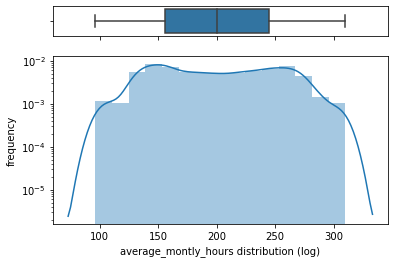

In [118]:
# trying log transformation
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["average_montly_hours"], ax=ax_box)
sns.distplot(df["average_montly_hours"], ax=ax_hist, bins=15).set_yscale('log')
ax_box.set(xlabel='')
ax_hist.set(xlabel='average_montly_hours distribution (log)')
ax_hist.set(ylabel='frequency')

In [95]:
# last_evaluation vs. left
hours_left = df.groupby('left').average_montly_hours.mean()
hours_left

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

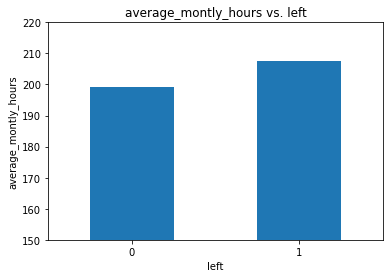

In [100]:
hours_left.plot(kind="bar", stacked=True)
plt.title("average_montly_hours vs. left")
plt.xlabel("left")
plt.ylabel("average_montly_hours")
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylim(150, 220)
plt.show()

**Conclusion for summary statistics**: numerical variables require log transformation for better prediction. `satisfaction_level` and `average_montly_hours` may be used in the model.

### Outliers

In [63]:
# satisfaction_level outliers
q1 = df.satisfaction_level.quantile(0.25)
q3 = df.satisfaction_level.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

outliers_sat = df[(df.satisfaction_level < lower_bound) | (df.satisfaction_level > upper_bound)]
outliers_sat.head()

-0.12999999999999995 1.39


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

In [66]:
# last_evaluation outliers
q1 = df.last_evaluation.quantile(0.25)
q3 = df.last_evaluation.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

eval = df[(df.last_evaluation < lower_bound) | (df.last_evaluation > upper_bound)]
eval.head()

0.09500000000000014 1.335


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

In [67]:
# average_montly_hours outliers
q1 = df.average_montly_hours.quantile(0.25)
q3 = df.average_montly_hours.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

hours = df[(df.average_montly_hours < lower_bound) | (df.average_montly_hours > upper_bound)]
hours.head()

22.5 378.5


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


There are no outliers as boundaries exceed min and max values.

### Data investigation

#### People with high 'salary' have higher 'average_montly_hours'?

In [73]:
# testing the hypothesis that people with high 'salary' have higher 'average_montly_hours'
sal_hours = df.groupby('salary').average_montly_hours.mean().sort_values()
sal_hours

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

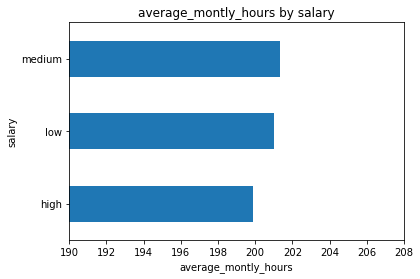

In [83]:
sal_hours.plot.barh(stacked=True)
plt.title("average_montly_hours by salary")
plt.xlabel("average_montly_hours")
plt.ylabel("salary")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlim(190, 208)
plt.show()

Actually, those who have a medium salary work slightly longer hours being the difference though quite small.

## Modelling

### Data Transformation

In [ ]:
# log transformation of numerical variables

In [ ]:
# transforming 'salary' catogories into 'int'

In [ ]:
# transforming 'deparment' catogories into 'int'

### Correlation analysis

**Note**. For a dichotomous categorical variable and a continuous variable you can calculate a Pearson correlation (point-biserial correlation coefficient) if the categorical variable has a 0/1-coding for the categories.

In [54]:
df[
    ['satisfaction_level', 
    'last_evaluation', 
    'number_project', 
    'average_montly_hours', 
    'time_spend_company']
  ].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000
